 # Power Load Prediction for West Zone - Prophet Model
 

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [2]:
power_data_west = pd.read_csv("west_interval_data_01-29-2019_01-27-2021.csv")

In [3]:
power_data_west['End Date Time'] = pd.to_datetime(power_data_west['End Date Time'], infer_datetime_format=True)
indexedDataset = power_data_west.set_index(['End Date Time'])

In [4]:
plot_df_west = pd.DataFrame(power_data_west, columns=['Peak Demand', 'Avg. Temperature', 'End Date Time'])

In [5]:
plot_df_west['End Date Time'].min()

Timestamp('2019-01-29 00:15:00')

In [6]:
plot_df_west['End Date Time'].max()

Timestamp('2022-01-27 00:00:00')

In [7]:
power_data_west['month'] = power_data_west['End Date Time'].dt.strftime('%b')

In [8]:
power_data_west['day_of_week'] = power_data_west['End Date Time'].dt.day_name()

In [9]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

date_range = pd.date_range(start='2019-01-01', end='2022-01-27')

cal = calendar()
holidays = cal.holidays(start=date_range.min(), end=date_range.max())

power_data_west['holiday'] = power_data_west['End Date Time'].dt.date.astype('datetime64').isin(holidays)

In [10]:
power_data_west.head(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
0,west,1/29/19 0:00,2019-01-29 00:15:00,211.2,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,844.8,KW,Jan,Tuesday,False
1,west,1/29/19 0:15,2019-01-29 00:30:00,210.4,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,841.6,KW,Jan,Tuesday,False
2,west,1/29/19 0:30,2019-01-29 00:45:00,208.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,832.0,KW,Jan,Tuesday,False
3,west,1/29/19 0:45,2019-01-29 01:00:00,212.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,848.0,KW,Jan,Tuesday,False
4,west,1/29/19 1:00,2019-01-29 01:15:00,203.2,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,812.8,KW,Jan,Tuesday,False
5,west,1/29/19 1:15,2019-01-29 01:30:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
6,west,1/29/19 1:30,2019-01-29 01:45:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
7,west,1/29/19 1:45,2019-01-29 02:00:00,208.8,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,835.2,KW,Jan,Tuesday,False
8,west,1/29/19 2:00,2019-01-29 02:15:00,217.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,870.4,KW,Jan,Tuesday,False
9,west,1/29/19 2:15,2019-01-29 02:30:00,229.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,918.4,KW,Jan,Tuesday,False


In [12]:
power_data_west.tail(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
104726,west,1/26/22 21:30,2022-01-26 21:45:00,284.0,KWH,NaN,NaN,52.0,FAHRENHEIT,NaN,1136.0,KW,Jan,Wednesday,False
104727,west,1/26/22 21:45,2022-01-26 22:00:00,288.8,KWH,NaN,NaN,52.0,FAHRENHEIT,NaN,1155.2,KW,Jan,Wednesday,False
104728,west,1/26/22 22:00,2022-01-26 22:15:00,301.6,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1206.4,KW,Jan,Wednesday,False
104729,west,1/26/22 22:15,2022-01-26 22:30:00,280.0,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1120.0,KW,Jan,Wednesday,False
104730,west,1/26/22 22:30,2022-01-26 22:45:00,296.8,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1187.2,KW,Jan,Wednesday,False
104731,west,1/26/22 22:45,2022-01-26 23:00:00,282.4,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1129.6,KW,Jan,Wednesday,False
104732,west,1/26/22 23:00,2022-01-26 23:15:00,288.8,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1155.2,KW,Jan,Wednesday,False
104733,west,1/26/22 23:15,2022-01-26 23:30:00,289.6,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1158.4,KW,Jan,Wednesday,False
104734,west,1/26/22 23:30,2022-01-26 23:45:00,294.4,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1177.6,KW,Jan,Wednesday,False
104735,west,1/26/22 23:45,2022-01-27 00:00:00,290.4,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1161.6,KW,Jan,Thursday,False


In [13]:
power_data_west.describe()

,Usage,Cost,Currency Unit,Avg. Temperature,Peak Demand
count,104724.000000,0.0,0.0,104716.000000,104724.000000
mean,309.636443,NaN,NaN,67.377211,1238.545770
std,75.557612,NaN,NaN,16.591545,302.230457
min,0.000000,NaN,NaN,29.000000,0.000000
25%,252.000000,NaN,NaN,54.000000,1008.000000
50%,308.000000,NaN,NaN,66.000000,1232.000000
75%,368.000000,NaN,NaN,79.000000,1472.000000
max,531.200000,NaN,NaN,114.000000,2124.800000


In [14]:
power_data_west.shape

(104736, 15)

In [15]:
power_data_west.dtypes

Service Agreement            object
Start Date Time              object
End Date Time        datetime64[ns]
Usage                       float64
Usage Unit                   object
Cost                        float64
Currency Unit               float64
Avg. Temperature            float64
Temperature Unit             object
Event Flags                  object
Peak Demand                 float64
Demand Unit                  object
month                        object
day_of_week                  object
holiday                        bool
dtype: object

In [16]:
#For checking missing values in dataset
power_data_west.isna().sum()

Service Agreement         0
Start Date Time           0
End Date Time             0
Usage                    12
Usage Unit               12
Cost                 104736
Currency Unit        104736
Avg. Temperature         20
Temperature Unit          0
Event Flags          104730
Peak Demand              12
Demand Unit              12
month                     0
day_of_week               0
holiday                   0
dtype: int64

In [17]:
power_data_west.fillna(method='ffill',inplace=True)
power_data_west.isna().sum()

Service Agreement         0
Start Date Time           0
End Date Time             0
Usage                     0
Usage Unit                0
Cost                 104736
Currency Unit        104736
Avg. Temperature          0
Temperature Unit          0
Event Flags            3840
Peak Demand               0
Demand Unit               0
month                     0
day_of_week               0
holiday                   0
dtype: int64

In [18]:
zero_usage_df = power_data_west.loc[power_data_west['Peak Demand'] == 0]
zero_usage_df.count()

Service Agreement    50
Start Date Time      50
End Date Time        50
Usage                50
Usage Unit           50
Cost                  0
Currency Unit         0
Avg. Temperature     50
Temperature Unit     50
Event Flags          50
Peak Demand          50
Demand Unit          50
month                50
day_of_week          50
holiday              50
dtype: int64

dataset.kW.plot()

## Prophet Timeseries Model

In [19]:
prophet_data = power_data_west[(power_data_west['End Date Time'] > '2019-01-01') & (power_data_west['End Date Time'] < '2022-02-01')]

In [20]:
prophet_data.head(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
0,west,1/29/19 0:00,2019-01-29 00:15:00,211.2,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,844.8,KW,Jan,Tuesday,False
1,west,1/29/19 0:15,2019-01-29 00:30:00,210.4,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,841.6,KW,Jan,Tuesday,False
2,west,1/29/19 0:30,2019-01-29 00:45:00,208.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,832.0,KW,Jan,Tuesday,False
3,west,1/29/19 0:45,2019-01-29 01:00:00,212.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,848.0,KW,Jan,Tuesday,False
4,west,1/29/19 1:00,2019-01-29 01:15:00,203.2,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,812.8,KW,Jan,Tuesday,False
5,west,1/29/19 1:15,2019-01-29 01:30:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
6,west,1/29/19 1:30,2019-01-29 01:45:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
7,west,1/29/19 1:45,2019-01-29 02:00:00,208.8,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,835.2,KW,Jan,Tuesday,False
8,west,1/29/19 2:00,2019-01-29 02:15:00,217.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,870.4,KW,Jan,Tuesday,False
9,west,1/29/19 2:15,2019-01-29 02:30:00,229.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,918.4,KW,Jan,Tuesday,False


In [21]:
prophet_data.tail(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
104726,west,1/26/22 21:30,2022-01-26 21:45:00,284.0,KWH,NaN,NaN,52.0,FAHRENHEIT,Daylight Savings,1136.0,KW,Jan,Wednesday,False
104727,west,1/26/22 21:45,2022-01-26 22:00:00,288.8,KWH,NaN,NaN,52.0,FAHRENHEIT,Daylight Savings,1155.2,KW,Jan,Wednesday,False
104728,west,1/26/22 22:00,2022-01-26 22:15:00,301.6,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1206.4,KW,Jan,Wednesday,False
104729,west,1/26/22 22:15,2022-01-26 22:30:00,280.0,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1120.0,KW,Jan,Wednesday,False
104730,west,1/26/22 22:30,2022-01-26 22:45:00,296.8,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1187.2,KW,Jan,Wednesday,False
104731,west,1/26/22 22:45,2022-01-26 23:00:00,282.4,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1129.6,KW,Jan,Wednesday,False
104732,west,1/26/22 23:00,2022-01-26 23:15:00,288.8,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1155.2,KW,Jan,Wednesday,False
104733,west,1/26/22 23:15,2022-01-26 23:30:00,289.6,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1158.4,KW,Jan,Wednesday,False
104734,west,1/26/22 23:30,2022-01-26 23:45:00,294.4,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1177.6,KW,Jan,Wednesday,False
104735,west,1/26/22 23:45,2022-01-27 00:00:00,290.4,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1161.6,KW,Jan,Thursday,False


In [22]:
prophet_data_mod = prophet_data[['End Date Time','Peak Demand', 'Avg. Temperature']].copy() 

In [23]:
prophet_data_mod.head(10)

,End Date Time,Peak Demand,Avg. Temperature
0,2019-01-29 00:15:00,844.8,54.0
1,2019-01-29 00:30:00,841.6,54.0
2,2019-01-29 00:45:00,832.0,54.0
3,2019-01-29 01:00:00,848.0,54.0
4,2019-01-29 01:15:00,812.8,55.0
5,2019-01-29 01:30:00,822.4,55.0
6,2019-01-29 01:45:00,822.4,55.0
7,2019-01-29 02:00:00,835.2,55.0
8,2019-01-29 02:15:00,870.4,55.0
9,2019-01-29 02:30:00,918.4,55.0


In [24]:
prophet_data_mod.rename(columns={'End Date Time':'ds','Avg. Temperature':'add1', 'Peak Demand':'y'}, inplace=True)

In [25]:
prophet_data_mod.head(10)

,ds,y,add1
0,2019-01-29 00:15:00,844.8,54.0
1,2019-01-29 00:30:00,841.6,54.0
2,2019-01-29 00:45:00,832.0,54.0
3,2019-01-29 01:00:00,848.0,54.0
4,2019-01-29 01:15:00,812.8,55.0
5,2019-01-29 01:30:00,822.4,55.0
6,2019-01-29 01:45:00,822.4,55.0
7,2019-01-29 02:00:00,835.2,55.0
8,2019-01-29 02:15:00,870.4,55.0
9,2019-01-29 02:30:00,918.4,55.0


In [26]:
X_train = prophet_data_mod[(prophet_data_mod['ds'] > '2019-01-01') & (prophet_data_mod['ds'] < '2021-01-01')]

X_test = prophet_data_mod[(prophet_data_mod['ds'] > '2021-01-01') ]

In [27]:
X_train.head(10)

,ds,y,add1
0,2019-01-29 00:15:00,844.8,54.0
1,2019-01-29 00:30:00,841.6,54.0
2,2019-01-29 00:45:00,832.0,54.0
3,2019-01-29 01:00:00,848.0,54.0
4,2019-01-29 01:15:00,812.8,55.0
5,2019-01-29 01:30:00,822.4,55.0
6,2019-01-29 01:45:00,822.4,55.0
7,2019-01-29 02:00:00,835.2,55.0
8,2019-01-29 02:15:00,870.4,55.0
9,2019-01-29 02:30:00,918.4,55.0


In [28]:
X_train.shape

(67487, 3)

In [29]:
X_test.head(10)

,ds,y,add1
67488,2021-01-01 00:15:00,812.8,40.0
67489,2021-01-01 00:30:00,800.0,40.0
67490,2021-01-01 00:45:00,841.6,40.0
67491,2021-01-01 01:00:00,822.4,40.0
67492,2021-01-01 01:15:00,793.6,40.0
67493,2021-01-01 01:30:00,828.8,40.0
67494,2021-01-01 01:45:00,816.0,40.0
67495,2021-01-01 02:00:00,793.6,40.0
67496,2021-01-01 02:15:00,809.6,40.0
67497,2021-01-01 02:30:00,796.8,40.0


In [30]:
X_test.shape

(37248, 3)

In [31]:
X_test_copy = X_test.copy()
X_test_copy.drop(columns="y")

,ds,add1
67488,2021-01-01 00:15:00,40.0
67489,2021-01-01 00:30:00,40.0
67490,2021-01-01 00:45:00,40.0
67491,2021-01-01 01:00:00,40.0
67492,2021-01-01 01:15:00,40.0
...,...,...
104731,2022-01-26 23:00:00,51.0
104732,2022-01-26 23:15:00,51.0
104733,2022-01-26 23:30:00,51.0
104734,2022-01-26 23:45:00,51.0


In [32]:
import pandas as pd
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [33]:
print('Model Training Started')

prophet_model = Prophet(yearly_seasonality=True)
prophet_model.add_regressor('add1')
prophet_model.fit(X_train)

print('Model Training Completed')

Model Training Started


/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -1926.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        151608     0.0322635       56484.1           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        156277     0.0235731       10908.9           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        156928     0.0150499       9018.67           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        157688    0.00950213       5027.57           1           1      444   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        157991    0.00416118       7473.08           1           1      548   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [34]:
prediction= prophet_model.predict(X_test_copy)
prediction

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01 00:15:00,1314.336403,942.779593,1225.440284,1314.336403,1314.336403,-120.057760,-120.057760,-120.057760,-224.761456,...,33.209366,33.209366,33.209366,-135.387762,-135.387762,-135.387762,0.0,0.0,0.0,1089.574947
1,2021-01-01 00:30:00,1314.348027,942.051841,1230.635223,1314.348027,1314.348027,-120.057760,-120.057760,-120.057760,-226.720654,...,33.137644,33.137644,33.137644,-135.431624,-135.431624,-135.431624,0.0,0.0,0.0,1087.627373
2,2021-01-01 00:45:00,1314.359651,938.240332,1225.856134,1314.359651,1314.359651,-120.057760,-120.057760,-120.057760,-228.693967,...,33.068960,33.068960,33.068960,-135.475447,-135.475447,-135.475447,0.0,0.0,0.0,1085.665684
3,2021-01-01 01:00:00,1314.371275,944.011824,1225.583649,1314.371275,1314.371275,-120.057760,-120.057760,-120.057760,-230.680119,...,33.003340,33.003340,33.003340,-135.519233,-135.519233,-135.519233,0.0,0.0,0.0,1083.691156
4,2021-01-01 01:15:00,1314.382899,940.718395,1226.779578,1314.382899,1314.382899,-120.057760,-120.057760,-120.057760,-232.675143,...,32.940807,32.940807,32.940807,-135.562981,-135.562981,-135.562981,0.0,0.0,0.0,1081.707756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37243,2022-01-26 23:00:00,1750.595751,-5564.311658,8559.125906,-5174.735894,8902.841200,-72.754756,-72.754756,-72.754756,-337.409256,...,35.371197,35.371197,35.371197,-306.453431,-306.453431,-306.453431,0.0,0.0,0.0,1413.186495
37244,2022-01-26 23:15:00,1750.607375,-5593.314553,8574.612364,-5175.097593,8903.091378,-72.754756,-72.754756,-72.754756,-339.073315,...,35.585356,35.585356,35.585356,-306.582838,-306.582838,-306.582838,0.0,0.0,0.0,1411.534060
37245,2022-01-26 23:30:00,1750.618999,-5600.656554,8597.054459,-5175.459292,8903.341556,-72.754756,-72.754756,-72.754756,-340.767882,...,35.794085,35.794085,35.794085,-306.712236,-306.712236,-306.712236,0.0,0.0,0.0,1409.851117
37246,2022-01-26 23:45:00,1750.630623,-5508.591079,8596.048682,-5175.820991,8903.591734,-72.754756,-72.754756,-72.754756,-342.487464,...,35.997265,35.997265,35.997265,-306.841626,-306.841626,-306.841626,0.0,0.0,0.0,1408.143159


In [35]:
final_df = pd.concat([pd.DataFrame(X_test['y'].to_numpy(), columns = ['Actual Peak Demand']), pd.DataFrame(prediction['yhat'].to_numpy(), columns = ['Predicted Peak Demand'])], axis=1)
final_df

,Actual Peak Demand,Predicted Peak Demand
0,812.8,1089.574947
1,800.0,1087.627373
2,841.6,1085.665684
3,822.4,1083.691156
4,793.6,1081.707756
...,...,...
37243,1129.6,1413.186495
37244,1155.2,1411.534060
37245,1158.4,1409.851117
37246,1177.6,1408.143159


In [36]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_absolute_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))

def mse_error(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=True)

def rmse_error(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=False)

In [37]:
mean_absolute_error_var = mean_absolute_error(final_df['Actual Peak Demand'], final_df['Predicted Peak Demand'])
mean_absolute_percentage_error_var = mean_absolute_percentage_error(final_df['Actual Peak Demand'], final_df['Predicted Peak Demand'])
mse_error_var = mse_error(final_df['Actual Peak Demand'], final_df['Predicted Peak Demand'])
rmse_error_var = rmse_error(final_df['Actual Peak Demand'], final_df['Predicted Peak Demand'])

In [38]:
print('Test Set Metrics')
print('MAPE: ' , mean_absolute_percentage_error_var)
print('MAE: ', mean_absolute_error_var)
print('MSE: ', mse_error_var)
print('RMSE: ', rmse_error_var)

Test Set Metrics
MAPE:  inf
MAE:  312.6933984676104
MSE:  146673.0430961796
RMSE:  382.9791679663264


<AxesSubplot:>

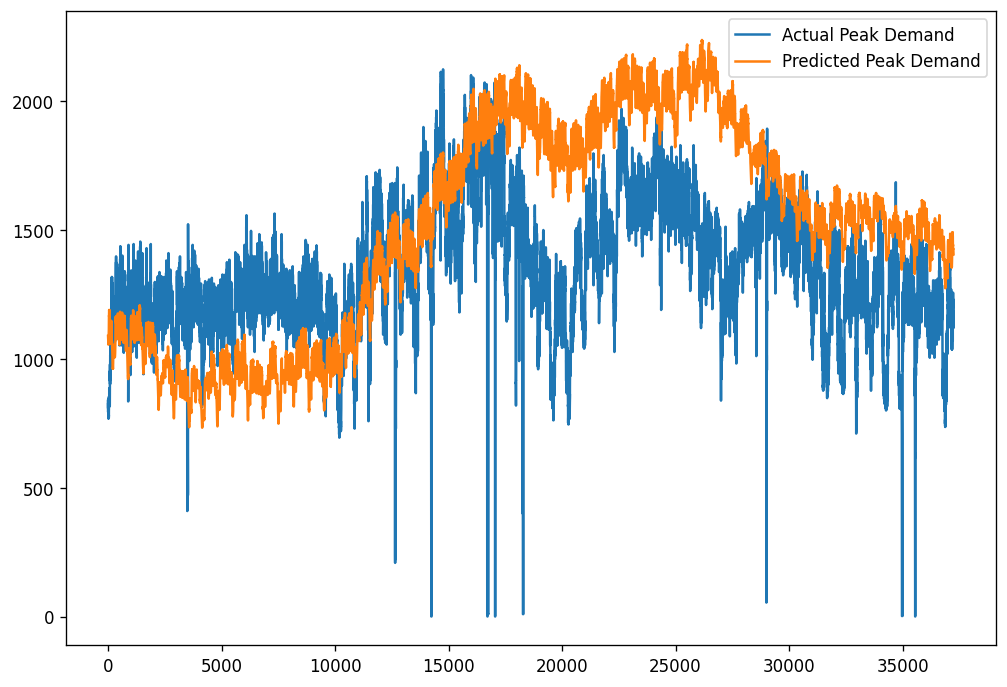

In [39]:
final_df.plot()